## Miguel Alfonso Gallego Alvarez

In [ ]:
import pandas as pd  # Manejo dataframe
import numpy as np  # Manejo lista arreglos
import openpyxl  # Tipo especial
import matplotlib.pyplot as plt  # Manejo tablas
import seaborn as sns # Manejo de tablas

In [ ]:
df = pd.read_excel("Salarios.xlsx")


In [ ]:
df.head()

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K
2,38,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,14,Married-civ-spouse,Wife,White,Female,0,0,40,United-States,<=50K


# Descripción columnas del dataset

- age: Edad de la persona en años. Tipo = Numérica continua

- education-num: Número de años de educación formal completados. Tipo = Numérica discreta

- marital-status: Estado civil actual de la persona (Never-married, Married-civ-spouse, Divorced, etc.). Tipo = Categórica nominal politómica

- relationship: Relación de la persona dentro del núcleo familiar (Husband, Wife, Not-in-family, Own-child, etc.). Tipo = Categórica nominal politómica

- race: Raza declarada de la persona (White, Black, Asian-Pac-Islander, etc.). Tipo = Categórica nominal politómica

- sex: Género declarado de la persona (Male, Female). Tipo = Categórica nominal dicotómica

- capital-gain: Ganancia de capital (USD) obtenida en el último año. Tipo = Numérica continua

- capital-loss: Pérdida de capital (USD) registrada en el último año. Tipo = Numérica continua

- hours-per-week: Número de horas trabajadas por semana. Tipo = Numérica discreta

- native-country: País de origen de la persona. Tipo = Categórica nominal politómica

- salary: Categoría salarial estimada (<=50K, >50K). Tipo = Categórica ordinal dicotómica

# EDA y Limpieza del data set

Conocemos la dimensión de la matriz

In [ ]:
df.shape

(29170, 11)

Conocemos los tipos de datos como los lee python, por si deben hacer cambios sobre el tipo de alguno de estos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   education-num   29170 non-null  int64 
 2   marital-status  29170 non-null  object
 3   relationship    29170 non-null  object
 4   race            29170 non-null  object
 5   sex             29170 non-null  object
 6   capital-gain    29170 non-null  int64 
 7   capital-loss    29170 non-null  int64 
 8   hours-per-week  29170 non-null  int64 
 9   native-country  29170 non-null  object
 10  salary          29170 non-null  object
dtypes: int64(5), object(6)
memory usage: 2.4+ MB


Se observa que no hay valores nulos non-null en todas las columnas, lo que simplifica la limpieza inicial.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
education-num,0
marital-status,0
relationship,0
race,0
sex,0
capital-gain,0
capital-loss,0
hours-per-week,0
native-country,0


En base a los primeros pasos se observa que el dataset cuenta con cinco variables numéricas enteras (age, education-num, capital-gain, capital-loss y hours-per-week), las cuales podrian ser  útiles para análisis estadísticos y modelos predictivos, y seis variables categóricas (marital-status, relationship, race, sex, native-country y salary), las cuales se podrían convertirse a tipo categoría para optimizar memoria y análisis. Ademas se confirma que no presenta valores nulos, lo que facilita el trabajo de limpieza, aunque será necesario revisar la presencia de valores atípicos y categorías poco frecuentes.

In [ ]:
df.head(25)

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,13,Never-married,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,13,Married-civ-spouse,Husband,White,Male,0,0,13,United-States,<=50K
2,38,9,Divorced,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,7,Married-civ-spouse,Husband,Black,Male,0,0,40,United-States,<=50K
4,37,14,Married-civ-spouse,Wife,White,Female,0,0,40,United-States,<=50K
5,52,9,Married-civ-spouse,Husband,White,Male,0,0,45,United-States,>50K
6,31,14,Never-married,Not-in-family,White,Female,14084,0,50,United-States,>50K
7,42,13,Married-civ-spouse,Husband,White,Male,5178,0,40,United-States,>50K
8,37,10,Married-civ-spouse,Husband,Black,Male,0,0,80,United-States,>50K
9,23,13,Never-married,Own-child,White,Female,0,0,30,United-States,<=50K


La conversión de variables como marital-status, relationship, race, sex, native-country y salary a tipo category se justifica porque representan grupos o etiquetas discretas sin un orden numérico real, lo que optimiza el uso de memoria y permite un manejo más eficiente en análisis y modelos. Mantener las variables numéricas en su formato original es clave para conservar la precisión en cálculos y evitar interpretaciones erróneas.

In [ ]:
df.nunique()

,0
age,73
education-num,16
marital-status,7
relationship,6
race,5
sex,2
capital-gain,119
capital-loss,89
hours-per-week,94
native-country,1


El dataset muestra una variabilidad adecuada en la mayoría de sus variables, lo que es positivo para el análisis. Variables como age, capital-gain, capital-loss y hours-per-week presentan un rango amplio de valores, lo que podría aportar información relevante para predecir el salario. Las variables categóricas como marital-status, relationship, race y sex tienen un número moderado de categorías, lo que facilita su codificación sin riesgo de alta dimensionalidad. Sin embargo, native-country presenta solo un valor único, lo que la hace irrelevante para el análisis y podría eliminarse, ya que no aporta variabilidad. La variable objetivo salary presenta únicamente dos categorías (<=50K y >50K), lo que indica que el análisis corresponde a un problema de clasificación binaria; aunque aún no se ha transformado a formato numérico (0 y 1), su naturaleza dicotómica permitirá esa conversión en la etapa de preprocesamiento para facilitar el modelado.

In [ ]:
df = df.drop(columns=["native-country"])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29170 non-null  int64 
 1   education-num   29170 non-null  int64 
 2   marital-status  29170 non-null  object
 3   relationship    29170 non-null  object
 4   race            29170 non-null  object
 5   sex             29170 non-null  object
 6   capital-gain    29170 non-null  int64 
 7   capital-loss    29170 non-null  int64 
 8   hours-per-week  29170 non-null  int64 
 9   salary          29170 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.2+ MB


In [ ]:
categoricas = ["marital-status", "relationship", "race", "sex", "salary"]

for col in categoricas:
    df[col] = df[col].astype("category")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29170 entries, 0 to 29169
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             29170 non-null  int64   
 1   education-num   29170 non-null  int64   
 2   marital-status  29170 non-null  category
 3   relationship    29170 non-null  category
 4   race            29170 non-null  category
 5   sex             29170 non-null  category
 6   capital-gain    29170 non-null  int64   
 7   capital-loss    29170 non-null  int64   
 8   hours-per-week  29170 non-null  int64   
 9   salary          29170 non-null  category
dtypes: category(5), int64(5)
memory usage: 1.3 MB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
age,0
education-num,0
marital-status,0
relationship,0
race,0
sex,0
capital-gain,0
capital-loss,0
hours-per-week,0
salary,0


Se decide convertir las variables marital-status, relationship, race, sex y salary a tipo categoría porque representan grupos o etiquetas discretas que permiten identificar patrones y segmentaciones relevantes para el análisis, especialmente en relación con la variable objetivo salary. Mantener las variables numéricas (age, education-num, capital-gain, capital-loss y hours-per-week) en su formato original es fundamental para preservar su significado cuantitativo y aprovecharlas en la detección de tendencias, correlaciones y posibles factores que influyen en el salario.

In [ ]:
df.head()

,age,education-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,13,Never-married,Not-in-family,White,Male,2174,0,40,<=50K
1,50,13,Married-civ-spouse,Husband,White,Male,0,0,13,<=50K
2,38,9,Divorced,Not-in-family,White,Male,0,0,40,<=50K
3,53,7,Married-civ-spouse,Husband,Black,Male,0,0,40,<=50K
4,37,14,Married-civ-spouse,Wife,White,Female,0,0,40,<=50K


In [ ]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,29170.000000,29170.000000,29170.000000,29170.000000,29170.000000
mean,38.655674,10.169455,1089.229928,88.510593,40.447755
std,13.722408,2.394966,7381.898528,405.681709,12.417203
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Las variables numéricas muestran valores dentro de rangos esperados para la mayoría de los casos, aunque existen posibles outliers. Por ejemplo, capital-gain y capital-loss presentan máximos muy elevados (99,999 y 4,356 respectivamente) en comparación con sus medianas, lo que indica que la mayoría de los registros son cero y unos pocos casos tienen valores atípicos muy altos. En hours-per-week se observan valores mínimos y máximos extremos (1 y 99 horas), que podrían no ser realistas y requerir revisión. La variable age va de 17 a 90 años, lo que es coherente para población laboral, aunque conviene validar casos límite. Estos hallazgos permiten enfocar el análisis en la detección y tratamiento de outliers, dado que pueden influir en el modelado y la interpretación de los resultados.

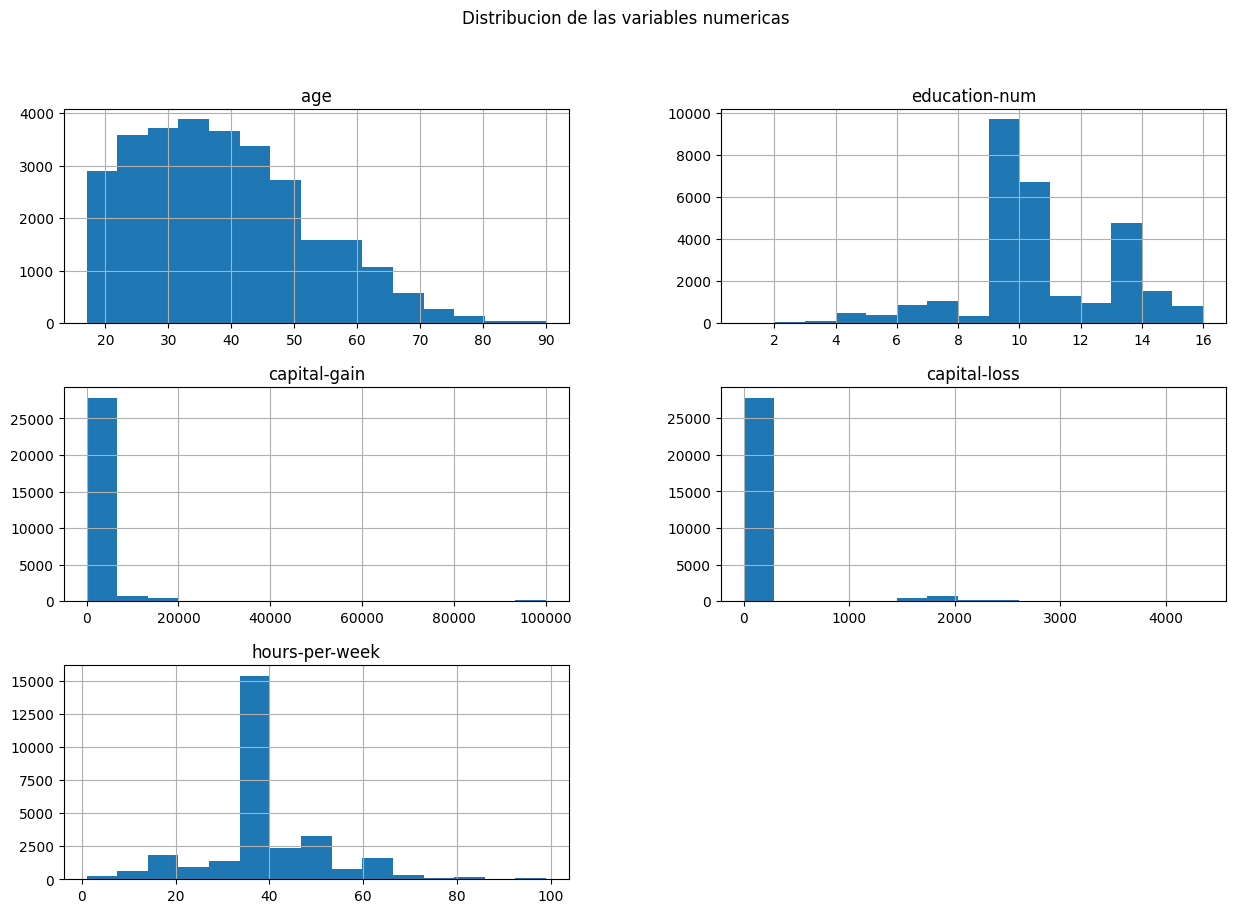

In [ ]:
df.select_dtypes(include=np.number).hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribucion de las variables numericas')
plt.show()

El análisis de las distribuciones revela patrones y posibles anomalías que influyen directamente en la calidad del modelo. La variable age concentra la mayoría de registros entre los 25 y 50 años, pero incluye casos desde 17 años, lo que podría corresponder a trabajos temporales o de medio tiempo y merece revisión para determinar su relevancia. education-num muestra niveles educativos dominantes en valores como 9, 10 y 13, lo que puede ser un factor determinante en la predicción de ingresos. Tanto capital-gain como capital-loss están fuertemente sesgados hacia cero, con pocos valores muy altos que actúan como outliers y podrían distorsionar el análisis si no se tratan adecuadamente. En hours-per-week, la concentración está en 40 horas semanales, con valores extremos como 1 y 99 horas que requieren validación, ya que podrían deberse a errores de registro o casos atípicos poco representativos. Estos hallazgos orientan la limpieza de datos hacia la depuración de valores extremos y la validación de casos especiales para asegurar un análisis más robusto.

In [ ]:
df[df["age"] < 18]

df[df["age"] < 18]["salary"].value_counts()


,count
salary,
<=50K,374
>50K,0


Se detectaron 374 registros con edad menor a 18 años, todos con salario <=50K. Este grupo no presenta variabilidad en la variable objetivo y corresponde a un segmento laboral atípico (probablemente empleos de medio tiempo o estudiantes). Se recomienda eliminarlos para evitar sesgos y centrar el análisis en población adulta económicamente activa.

In [ ]:
df = df[(df["age"] >= 18) & (df["age"] <= 90)]

Se decidió filtrar las edades para conservar únicamente registros entre 18 y 90 años. Los menores de 18 no aportan variabilidad en la variable objetivo (todos presentan salario <=50K) y corresponden a un segmento laboral atípico que podría introducir sesgos. El límite superior de 90 años se mantiene como valor máximo razonable para la población en edad laboral, evitando posibles registros anómalos que distorsionen el análisis y el modelado.

<Axes: xlabel='capital-gain'>

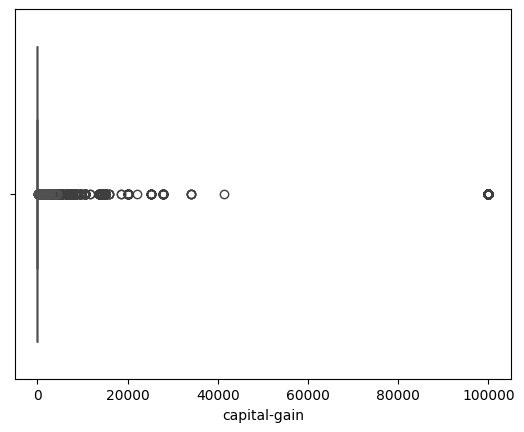

In [ ]:

df["capital-gain"].describe()
df["capital-loss"].describe()

sns.boxplot(x=df["capital-gain"])
sns.boxplot(x=df["capital-loss"])

La mayoría de las personas en el dataset no reporta ganancias de capital, pero hay unos pocos casos con valores muy altos que se salen del comportamiento general. Estos casos, aunque pueden ser reales, son poco comunes y podrían influir demasiado en el análisis.

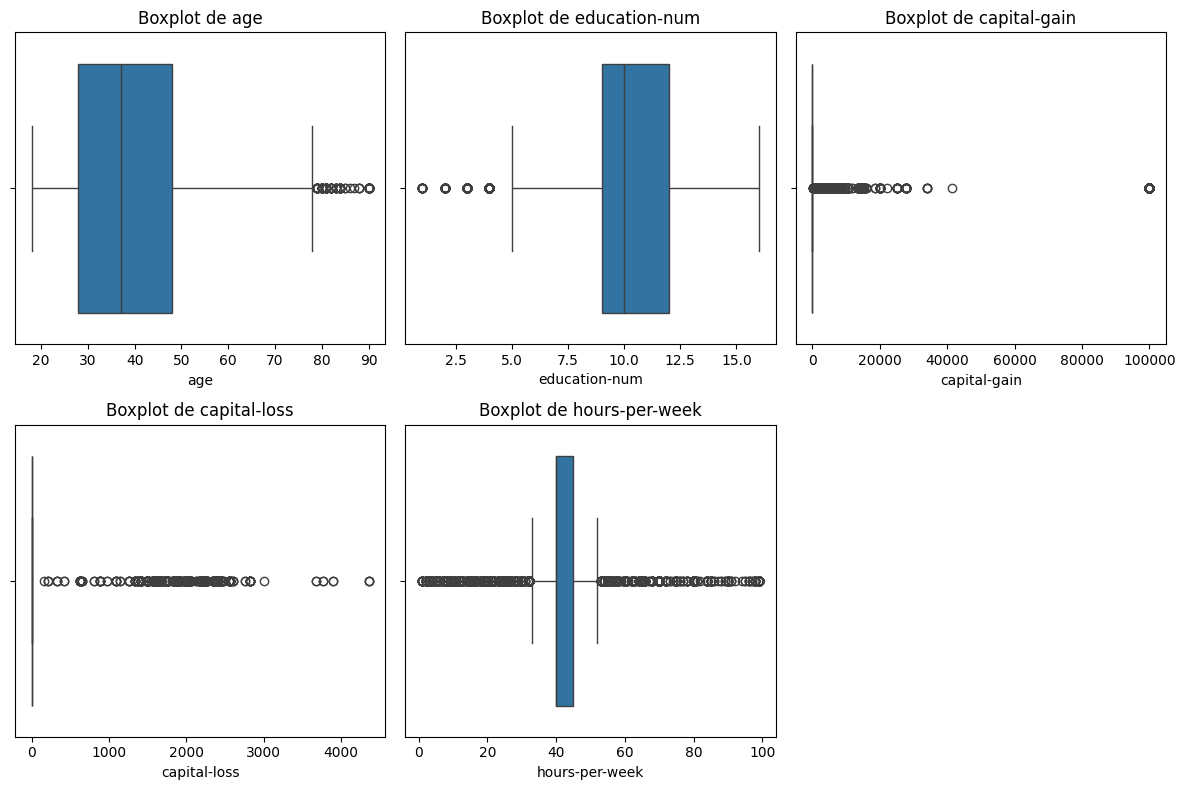

In [ ]:
num_cols = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


plt.figure(figsize=(12, 8))


for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()


La mayoría de los datos están dentro de rangos normales, pero hay casos que llaman la atención. En age, casi todos están en edades laborales, pero hay personas con más de 80 años que son muy pocas y habría que revisar si son reales. En education-num, algunos tienen niveles de estudio muy bajos que podrían juntarse en grupos más generales. En capital-gain y capital-loss casi todos tienen valor cero, pero hay unos pocos con cifras muy altas que sobresalen mucho y podrían influir demasiado en el análisis si no se ajustan. En hours-per-week, la mayoría trabaja 40 horas, aunque también hay casos de personas con solo 1 hora o hasta 99 horas por semana, que son poco comunes y convendría revisar si son correctos.

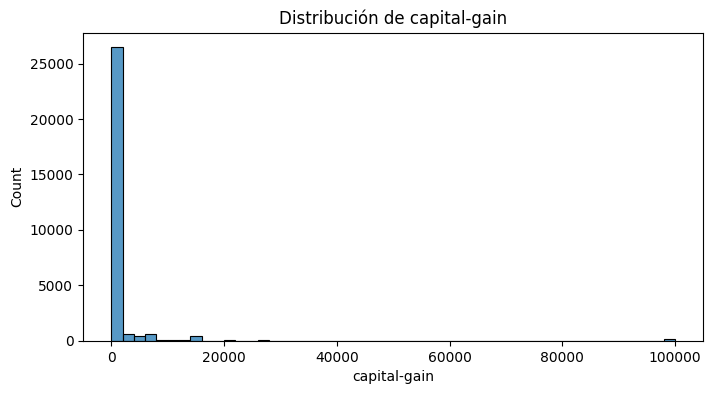

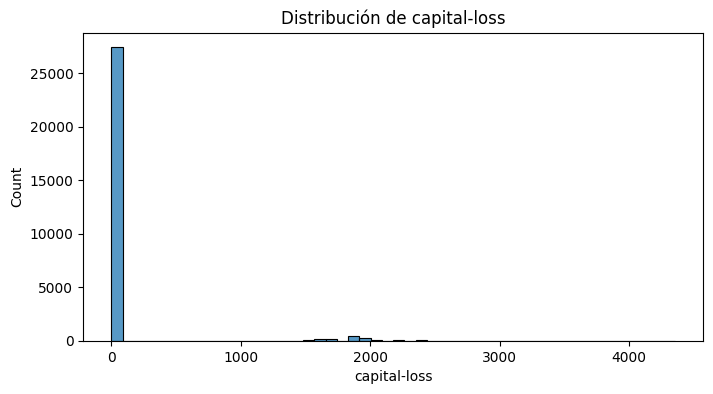

In [ ]:
for col in ["capital-gain", "capital-loss"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=False)
    plt.title(f"Distribución de {col}")
    plt.show()

En ambas variables (capital-gain y capital-loss) la gran mayoría de los registros tienen valor cero, lo que indica que la mayoría de las personas no reportan ganancias ni pérdidas de capital. Solo un grupo muy pequeño presenta valores positivos, y dentro de ellos hay casos extremadamente altos que se alejan mucho del resto. Este patrón genera una distribución muy sesgada y con outliers evidentes, lo que puede afectar el análisis y el entrenamiento de modelos.

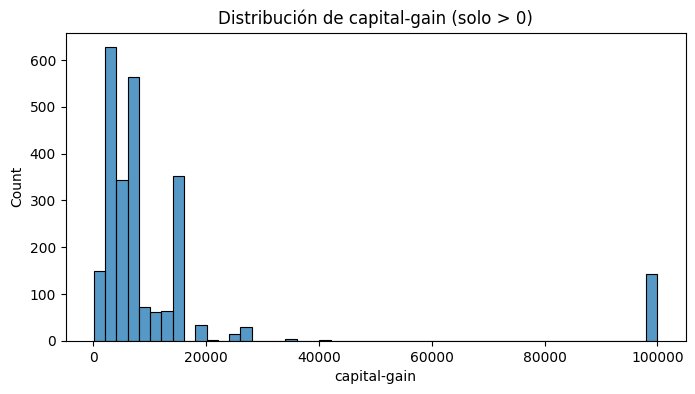

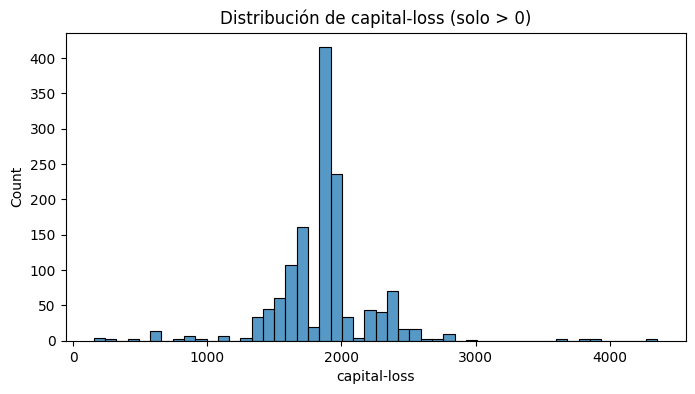

In [ ]:
for col in ["capital-gain", "capital-loss"]:
    plt.figure(figsize=(8,4))
    sns.histplot(df[df[col] > 0][col], bins=50, kde=False)
    plt.title(f"Distribución de {col} (solo > 0)")
    plt.show()

Al analizar solo los valores mayores a cero, se observa que tanto en capital-gain como en capital-loss la distribución sigue estando muy concentrada en rangos bajos o medios, pero con picos bien definidos y unos pocos valores extremadamente altos. En capital-gain destaca un valor muy separado del resto (cercano a 100,000), mientras que en capital-loss la mayoría de los casos se concentran alrededor de 2,000, con unos pocos que superan los 4,000. Esto confirma que, aunque los ceros son mayoría, los valores positivos también presentan outliers que podrían influir de forma desproporcionada en el análisis y modelado.

El análisis de las distribuciones de capital-gain y capital-loss muestra que, aunque la mayoría de los valores son cero, existe un grupo reducido con montos positivos, algunos de ellos muy elevados. Estos valores, aunque son outliers, representan situaciones reales que aportan información sobre ingresos adicionales y pérdidas significativas, por lo que se mantendrán en el dataset. Conservar estas variables permite reflejar de manera más completa las diferentes fuentes de ingresos y egresos de capital, información que puede ser clave para el análisis y para identificar patrones relevantes en el conjunto de datos.

In [ ]:
categoricas = ["marital-status", "relationship", "race", "sex", "salary"]


In [ ]:
for col in categoricas:
    print(f" {col}")
    print(df[col].value_counts())
    print("-" * 40)


 marital-status
marital-status
Married-civ-spouse       13366
Never-married             9207
Divorced                  4162
Widowed                    902
Separated                  883
Married-spouse-absent      253
Married-AF-spouse           23
Name: count, dtype: int64
----------------------------------------
 relationship
relationship
Husband           11860
Not-in-family      7519
Own-child          4344
Unmarried          3028
Wife               1361
Other-relative      684
Name: count, dtype: int64
----------------------------------------
 race
race
White                 25288
Black                  2800
Amer-Indian-Eskimo      293
Asian-Pac-Islander      291
Other                   124
Name: count, dtype: int64
----------------------------------------
 sex
sex
Male      19292
Female     9504
Name: count, dtype: int64
----------------------------------------
 salary
salary
<=50K    21625
>50K      7171
Name: count, dtype: int64
----------------------------------------


In [ ]:
for col in categoricas:
    print(f" {col}")
    print((df[col].value_counts(normalize=True) * 100).round(2))
    print("-" * 40)


 marital-status
marital-status
Married-civ-spouse       46.42
Never-married            31.97
Divorced                 14.45
Widowed                   3.13
Separated                 3.07
Married-spouse-absent     0.88
Married-AF-spouse         0.08
Name: proportion, dtype: float64
----------------------------------------
 relationship
relationship
Husband           41.19
Not-in-family     26.11
Own-child         15.09
Unmarried         10.52
Wife               4.73
Other-relative     2.38
Name: proportion, dtype: float64
----------------------------------------
 race
race
White                 87.82
Black                  9.72
Amer-Indian-Eskimo     1.02
Asian-Pac-Islander     1.01
Other                  0.43
Name: proportion, dtype: float64
----------------------------------------
 sex
sex
Male      67.0
Female    33.0
Name: proportion, dtype: float64
----------------------------------------
 salary
salary
<=50K    75.1
>50K     24.9
Name: proportion, dtype: float64
-------------------

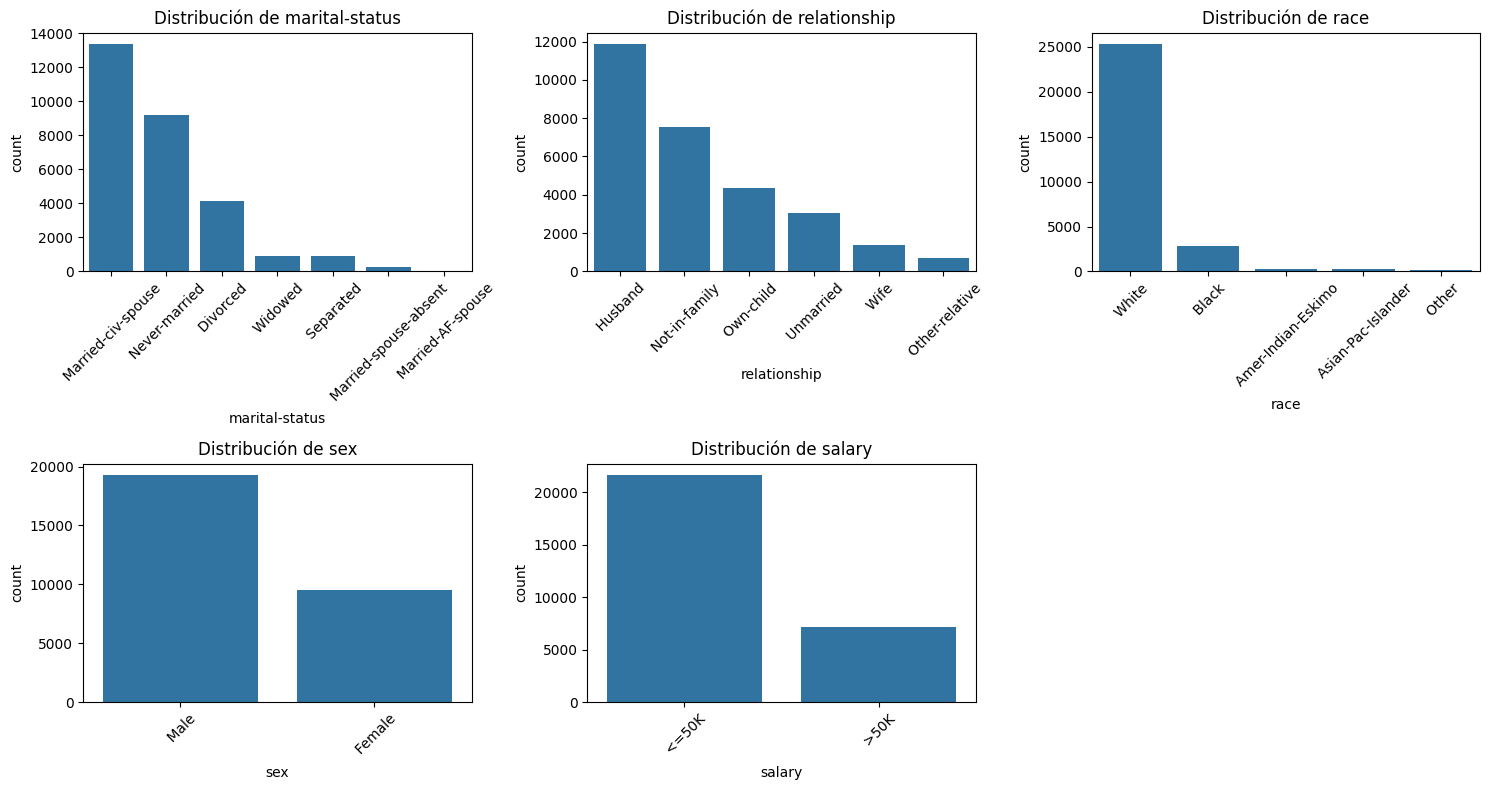

In [ ]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(categoricas, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()

- Marital-status
Predominan las personas casadas con cónyuge presente (Married-civ-spouse), seguidas de quienes nunca se han casado y divorciados. Las demás categorías (Widowed, Separated, Married-spouse-absent, Married-AF-spouse) son muy poco frecuentes, lo que sugiere que podrían agruparse en un grupo “Otros” para simplificar el análisis.

- Relationship
La mayoría se identifica como “Husband” o “Not-in-family”, seguidos de “Own-child”. Las categorías “Wife” y “Other-relative” tienen baja representación y también podrían considerarse para agrupación.

- Race
Existe un claro dominio de la categoría “White” (muy superior a las demás), seguida por “Black”. Las otras (Amer-Indian-Eskimo, Asian-Pac-Islander, Other) representan porcentajes muy bajos, lo que puede limitar su impacto en el análisis individual y justificar su agrupación.

- Sex
Se observa una diferencia marcada entre hombres (mayoría) y mujeres. Esto podría ser relevante al analizar diferencias de ingresos por género.

- Salary
Tres cuartas partes de la población tienen ingresos <=50K, mientras que solo una cuarta parte supera los >50K, evidenciando un desbalance en la variable objetivo que conviene tener presente.

📊 Porcentaje de salario por estado civil:
salary                 <=50K   >50K
marital-status                     
Divorced               89.55  10.45
Married-AF-spouse      56.52  43.48
Married-civ-spouse     54.23  45.77
Married-spouse-absent  89.72  10.28
Never-married          95.13   4.87
Separated              93.20   6.80
Widowed                91.69   8.31


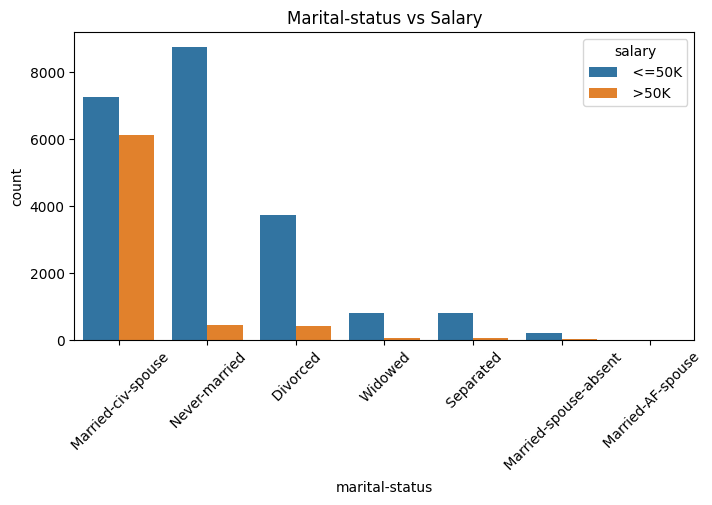

In [ ]:
tabla_marital = pd.crosstab(df["marital-status"], df["salary"], normalize="index") * 100
print("📊 Porcentaje de salario por estado civil:")
print(tabla_marital.round(2))


plt.figure(figsize=(8,4))
sns.countplot(x="marital-status", hue="salary", data=df,
              order=df["marital-status"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Marital-status vs Salary")
plt.show()

Las personas casadas con cónyuge presente (Married-civ-spouse) y las clasificadas como Married-AF-spouse presentan el mayor porcentaje de ingresos superiores a 50K (45,77% y 43,48% respectivamente), lo que indica una asociación positiva entre estar casado y percibir salarios más altos. En contraste, los grupos Never-married, Separated y Widowed muestran una proporción muy baja de ingresos altos (entre 6% y 8%), lo que sugiere que en estos casos predominan los salarios menores o iguales a 50K. Este patrón sugiere que el estado civil podría ser un factor relevante para diferenciar niveles de ingreso en el análisis.

📊 Porcentaje de salario por tipo de relación:
salary          <=50K   >50K
relationship                
Husband         54.26  45.74
Not-in-family   89.45  10.55
Other-relative  96.05   3.95
Own-child       98.64   1.36
Unmarried       93.53   6.47
Wife            50.70  49.30


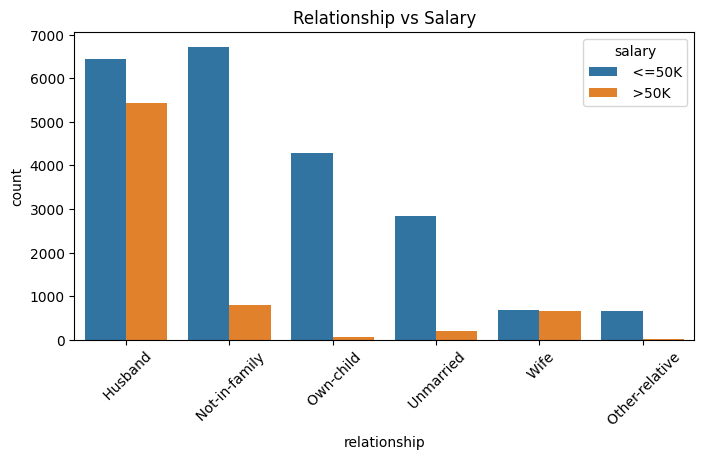

In [ ]:
tabla_relationship = pd.crosstab(df["relationship"], df["salary"], normalize="index") * 100
print("📊 Porcentaje de salario por tipo de relación:")
print(tabla_relationship.round(2))

plt.figure(figsize=(8,4))
sns.countplot(x="relationship", hue="salary", data=df,
              order=df["relationship"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Relationship vs Salary")
plt.show()

El tipo de relación muestra una fuerte asociación con el nivel de ingresos. Los grupos Husband y Wife presentan las mayores proporciones de salarios superiores a 50K (45,74% y 49,30% respectivamente), lo que sugiere que las personas en roles conyugales tienen mayores probabilidades de ingresos altos. En contraste, categorías como Own-child, Other-relative y Unmarried tienen porcentajes muy bajos de salarios >50K (entre 1% y 6%), lo que indica que en estos grupos predominan ingresos menores o iguales a 50K. Este patrón refuerza la idea de que la estructura familiar y el rol dentro del hogar podrían influir significativamente en el nivel de ingresos.

📊 Porcentaje de salario por raza:
salary              <=50K   >50K
race                            
Amer-Indian-Eskimo  88.05  11.95
Asian-Pac-Islander  76.63  23.37
Black               87.46  12.54
Other               89.52  10.48
White               73.49  26.51


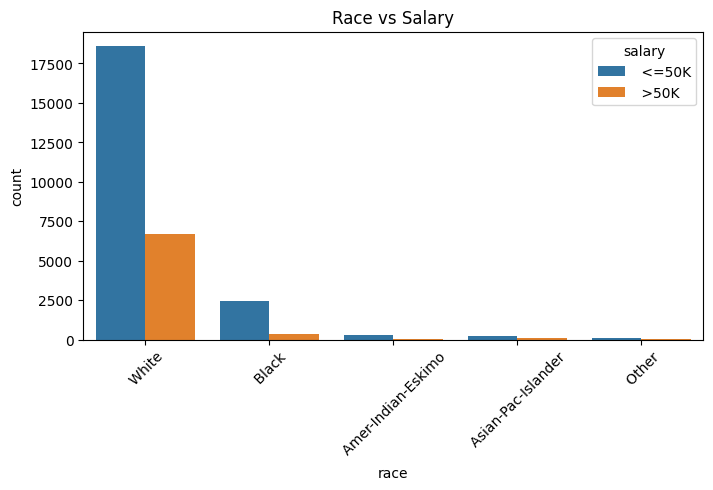

In [ ]:
tabla_race = pd.crosstab(df["race"], df["salary"], normalize="index") * 100
print("📊 Porcentaje de salario por raza:")
print(tabla_race.round(2))

plt.figure(figsize=(8,4))
sns.countplot(x="race", hue="salary", data=df,
              order=df["race"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Race vs Salary")
plt.show()

La variable race muestra una notable disparidad en la proporción de salarios >50K. El grupo White presenta el porcentaje más alto de ingresos superiores a 50K (26,51%), lo que podría estar relacionado con una mayor representación en ocupaciones o niveles educativos mejor remunerados. En contraste, otras razas como Black, Amer-Indian-Eskimo, Asian-Pac-Islander y Other muestran porcentajes significativamente más bajos, todos por debajo del 12%. Este patrón indica que, dentro del conjunto de datos, la raza podría estar asociada a diferencias en los ingresos, aunque es importante considerar que esto no implica causalidad, sino que podría reflejar desigualdades estructurales o distribución en tipos de empleo.

📊 Porcentaje de salario por sexo:
salary  <=50K   >50K
sex                 
Female  88.72  11.28
Male    68.39  31.61


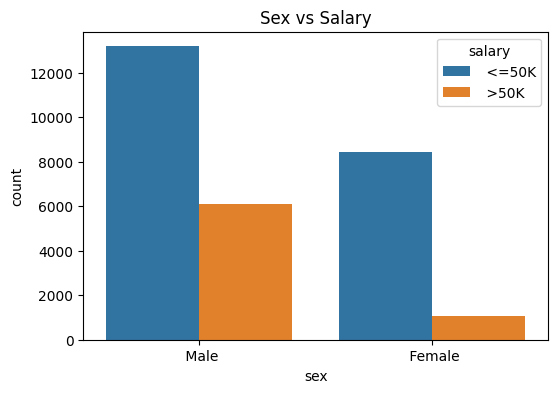

In [ ]:
tabla_sex = pd.crosstab(df["sex"], df["salary"], normalize="index") * 100
print("📊 Porcentaje de salario por sexo:")
print(tabla_sex.round(2))

plt.figure(figsize=(6,4))
sns.countplot(x="sex", hue="salary", data=df,
              order=df["sex"].value_counts().index)
plt.title("Sex vs Salary")
plt.show()

En la variable sex se observa una diferencia significativa en la distribución de salarios: el 31,61% de los hombres (Male) perciben ingresos superiores a 50K, frente a solo el 11,28% de las mujeres (Female). Esto sugiere una brecha salarial considerable entre géneros, posiblemente vinculada a factores como el tipo de ocupaciones, experiencia laboral, acceso a promociones o sesgos en el mercado laboral. Además, la mayoría de los registros en ambas categorías de sexo corresponden a ingresos ≤50K, lo que refuerza que los salarios altos son menos frecuentes en el conjunto de datos, pero especialmente menos comunes en mujeres.

/tmp/ipython-input-1467522478.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_race_edu_num = df.groupby("race")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)


                     mean   std  min  max  median  count
race                                                    
Amer-Indian-Eskimo   9.38  2.20    2   16     9.0    293
Asian-Pac-Islander  10.66  2.07    3   15    10.0    291
Black                9.50  2.23    1   16     9.0   2800
Other                9.73  2.44    3   16    10.0    124
White               10.30  2.38    1   16    10.0  25288


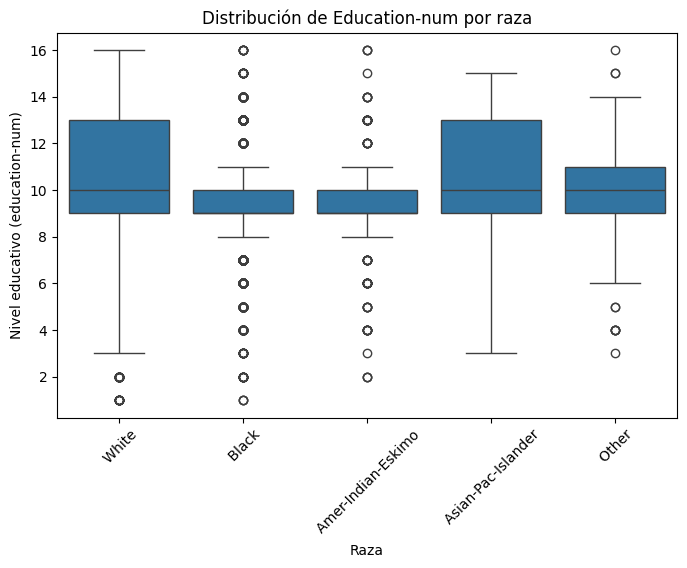

In [ ]:

resumen_race_edu_num = df.groupby("race")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print(resumen_race_edu_num)


plt.figure(figsize=(8,5))
sns.boxplot(x="race", y="education-num", data=df, order=df["race"].value_counts().index)
plt.title("Distribución de Education-num por raza")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Raza")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-3602619830.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen_race_edu_num = df.groupby("race")["education-num"].agg([
/tmp/ipython-input-3602619830.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


📋 Resumen estadístico por raza:

                     mean   std  min  max  median  count
race                                                    
Amer-Indian-Eskimo   9.38  2.20    2   16     9.0    293
Asian-Pac-Islander  10.66  2.07    3   15    10.0    291
Black                9.50  2.23    1   16     9.0   2800
Other                9.73  2.44    3   16    10.0    124
White               10.30  2.38    1   16    10.0  25288


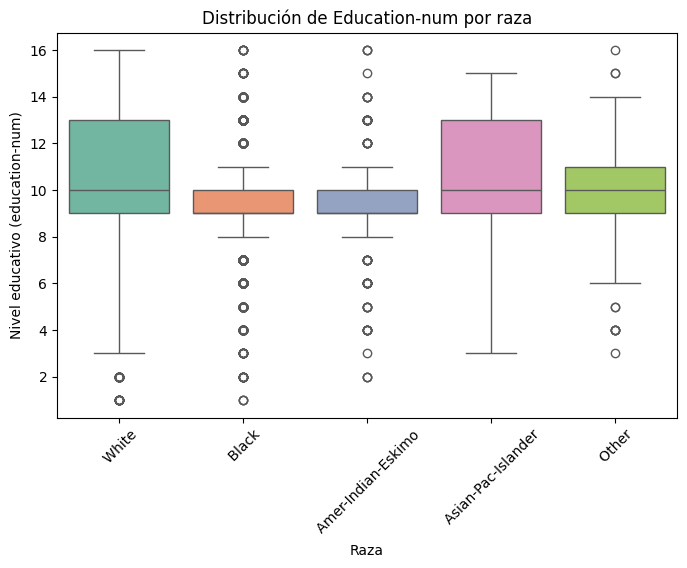

In [ ]:

resumen_race_edu_num = df.groupby("race")["education-num"].agg([
    "mean",    # Promedio
    "std",     # Desviación estándar
    "min",     # Mínimo
    "max",     # Máximo
    "median",  # Mediana
    "count"    # Número de registros
]).round(2)

print("📋 Resumen estadístico por raza:\n")
print(resumen_race_edu_num)


plt.figure(figsize=(8,5))
sns.boxplot(
    x="race",
    y="education-num",
    data=df,
    order=df["race"].value_counts().index,
    palette="Set2"
)
plt.title("Distribución de Education-num por raza")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Raza")
plt.xticks(rotation=45)
plt.show()


Los datos muestran que Asian-Pac-Islander y White tienen niveles educativos promedio y medianos más altos, lo que podría relacionarse con una mayor proporción de ingresos superiores a 50K.

Por el contrario, Black y Amer-Indian-Eskimo, con medianas más bajas en education-num, podrían estar en desventaja para alcanzar salarios altos, considerando que el nivel educativo suele estar correlacionado con mejores oportunidades laborales y remuneraciones.

El boxplot confirma que, aunque existen individuos con educación alta en todos los grupos, la concentración de niveles educativos más altos es mayor en Asian-Pac-Islander y White, lo que probablemente se refleje en una mayor presencia de estos grupos en los salarios >50K.

In [ ]:
df["salary"].unique()


[' <=50K', ' >50K']
Categories (2, object): [' <=50K', ' >50K']

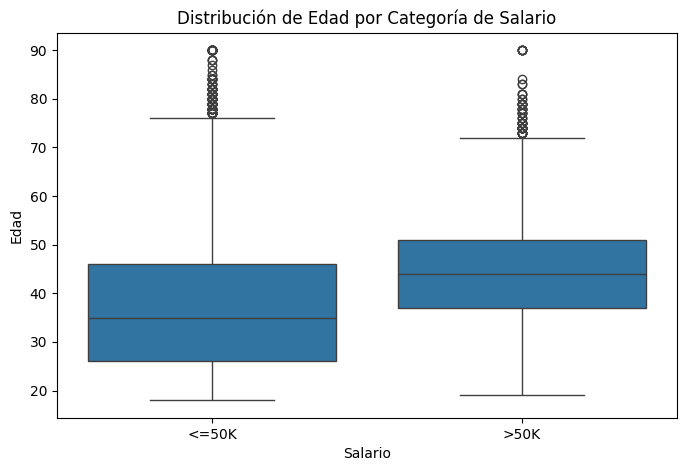

In [ ]:

df["salary"] = df["salary"].str.strip()

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="age", data=df, order=["<=50K", ">50K"])
plt.title("Distribución de Edad por Categoría de Salario")
plt.ylabel("Edad")
plt.xlabel("Salario")
plt.show()


El análisis de la distribución de la edad según el nivel de salario revela que las personas con ingresos superiores a 50K suelen tener una edad media más alta que aquellas con ingresos iguales o inferiores a 50K. En el grupo de menores ingresos, la mediana se sitúa alrededor de los 35 años, concentrándose principalmente entre los 25 y 45 años. En cambio, para los salarios superiores a 50K, la mediana aumenta a aproximadamente 43-45 años, con una mayor concentración entre los 35 y 55 años. Estos resultados sugieren que la experiencia y el tiempo en el mercado laboral influyen de manera significativa en la probabilidad de alcanzar ingresos más elevados, ya que a medida que aumenta la edad también crece la proporción de personas con salarios más altos.

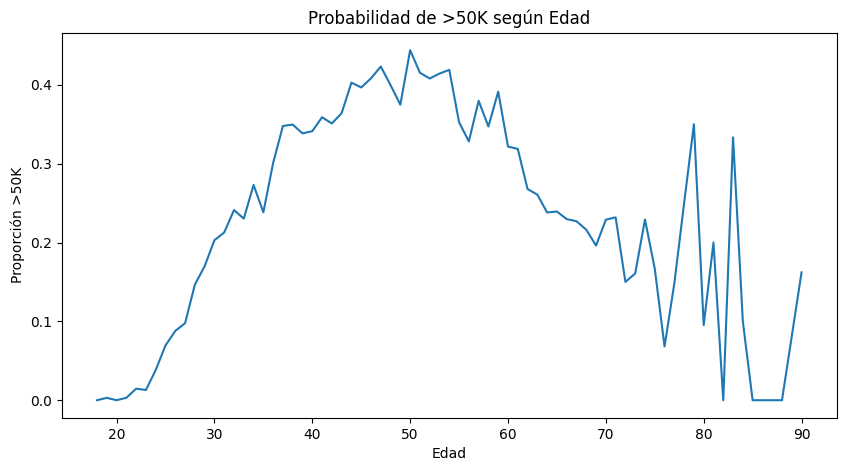

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x="age",
    y=df["salary"].apply(lambda x: 1 if x == ">50K" else 0),
    errorbar=None
)
plt.title("Probabilidad de >50K según Edad")
plt.ylabel("Proporción >50K")
plt.xlabel("Edad")
plt.show()


La gráfica muestra que la probabilidad de tener un salario superior a 50K aumenta de forma notable a partir de los 25 años, alcanzando su punto máximo entre los 45 y 50 años, donde se supera el 40 % de probabilidad. Después de los 55 años, la tendencia comienza a disminuir gradualmente, indicando una menor proporción de ingresos altos en edades avanzadas. En las edades extremas (mayores de 70 años) la variabilidad es alta debido a que hay menos datos, lo que genera fluctuaciones más marcadas. Esto sugiere que la edad laboral media y madura es el periodo con mayor probabilidad de alcanzar salarios más altos, posiblemente por la combinación de experiencia acumulada, estabilidad laboral y posiciones mejor remuneradas.

¿Cómo varía el nivel educativo (education-num) entre las personas con salario >50K y <=50K, y qué relación podría tener con las oportunidades laborales?

📊 Resumen estadístico de education-num por salario:
         mean   std  min  max  median  count
salary                                      
<=50K    9.76  2.21    1   16     9.0  21625
>50K    11.58  2.33    2   16    12.0   7171


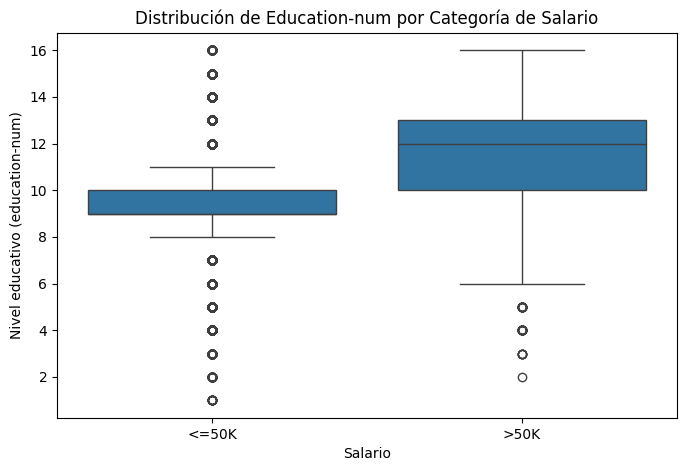

In [ ]:
resumen_edu = df.groupby("salary")["education-num"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("📊 Resumen estadístico de education-num por salario:")
print(resumen_edu)

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="education-num", data=df, order=["<=50K", ">50K"])
plt.title("Distribución de Education-num por Categoría de Salario")
plt.ylabel("Nivel educativo (education-num)")
plt.xlabel("Salario")
plt.show()

El análisis muestra que las personas con un salario mayor a 50K tienden a tener un nivel educativo más alto que aquellas con salarios de 50K o menos. La mediana de education-num en el grupo de altos ingresos es de 12 años de educación, mientras que en el grupo de menores ingresos es de 9 años. Además, la dispersión en el grupo >50K es ligeramente mayor, lo que indica que dentro de este grupo hay personas con niveles educativos más variados, aunque en general tienden a estar en niveles altos. Este patrón sugiere una relación positiva entre el nivel educativo y la probabilidad de obtener un salario mayor a 50K, lo que respalda la hipótesis de que la educación es un factor relevante en el potencial de ingresos.

📊 Resumen estadístico de hours-per-week por salario:
         mean    std  min  max  median  count
salary                                       
<=50K   39.10  12.22    1   99    40.0  21625
>50K    45.51  11.03    1   99    40.0   7171


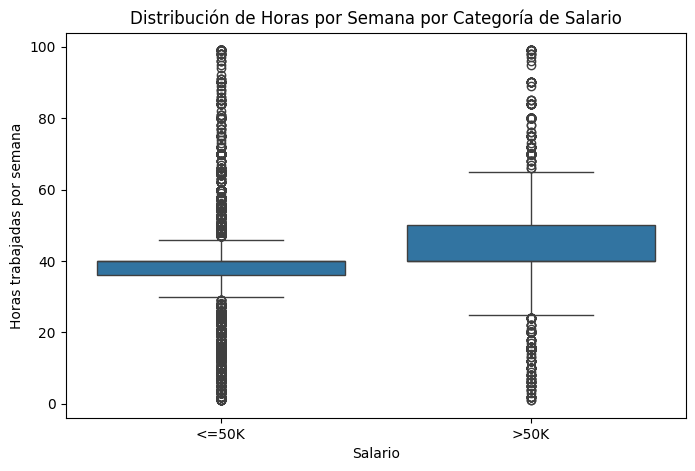

In [ ]:
resumen_hours = df.groupby("salary")["hours-per-week"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("📊 Resumen estadístico de hours-per-week por salario:")
print(resumen_hours)

plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="hours-per-week", data=df, order=["<=50K", ">50K"])
plt.title("Distribución de Horas por Semana por Categoría de Salario")
plt.ylabel("Horas trabajadas por semana")
plt.xlabel("Salario")
plt.show()

El análisis revela que las personas con un salario mayor a 50K trabajan, en promedio, más horas por semana (45.5 horas) en comparación con quienes ganan 50K o menos (39.1 horas). Aunque la mediana en ambos grupos es de 40 horas, el grupo de mayores ingresos presenta una mayor concentración de individuos que trabajan por encima de la jornada estándar, lo que sugiere que una mayor dedicación horaria podría estar asociada a mejores ingresos. Además, se observa una menor dispersión en el grupo >50K, lo que indica que sus horas trabajadas son más consistentes, mientras que en el grupo ≤50K existe una mayor variabilidad y casos extremos de jornadas muy bajas o muy altas.

¿Qué relación existe entre las ganancias/pérdidas de capital (capital-gain y capital-loss) y la probabilidad de estar en el grupo >50K?

📊 Resumen estadístico de capital-gain por salario:
           mean       std  min    max  median  count
salary                                              
<=50K    151.73    937.89    0  41310     0.0  21625
>50K    3967.29  14418.23    0  99999     0.0   7171

📊 Resumen estadístico de capital-loss por salario:
          mean     std  min   max  median  count
salary                                          
<=50K    54.14  313.95    0  4356     0.0  21625
>50K    194.47  594.72    0  3683     0.0   7171


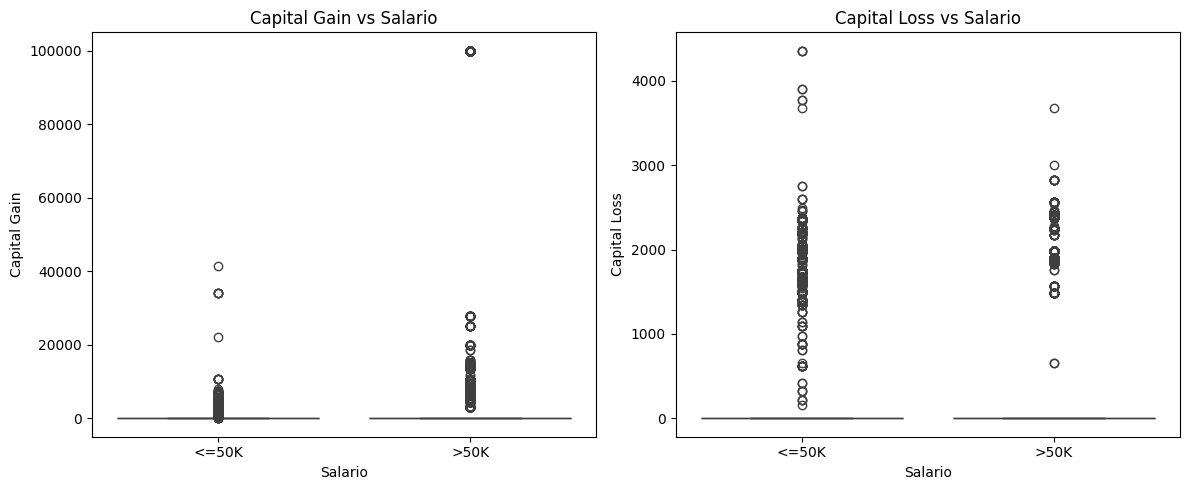

In [ ]:
resumen_gain = df.groupby("salary")["capital-gain"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("📊 Resumen estadístico de capital-gain por salario:")
print(resumen_gain)

resumen_loss = df.groupby("salary")["capital-loss"].agg(["mean", "std", "min", "max", "median", "count"]).round(2)
print("\n📊 Resumen estadístico de capital-loss por salario:")
print(resumen_loss)


fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.boxplot(x="salary", y="capital-gain", data=df, order=["<=50K", ">50K"], ax=axes[0])
axes[0].set_title("Capital Gain vs Salario")
axes[0].set_ylabel("Capital Gain")
axes[0].set_xlabel("Salario")

sns.boxplot(x="salary", y="capital-loss", data=df, order=["<=50K", ">50K"], ax=axes[1])
axes[1].set_title("Capital Loss vs Salario")
axes[1].set_ylabel("Capital Loss")
axes[1].set_xlabel("Salario")

plt.tight_layout()
plt.show()

El análisis de capital gain y capital loss en relación con el salario muestra una fuerte diferencia entre los grupos.
En cuanto a capital gain, las personas con ingresos superiores a 50K presentan un promedio significativamente mayor (3967.3) frente a las que ganan ≤50K (151.7), lo que sugiere que las ganancias de capital son un factor importante asociado a mayores ingresos. Sin embargo, la mediana es cero en ambos casos, indicando que la mayoría de las personas no tienen ganancias de capital y que el promedio está influenciado por pocos valores extremos muy altos.

En capital loss, ocurre algo similar aunque menos pronunciado: quienes ganan más de 50K tienen pérdidas de capital promedio más altas (194.5) que el grupo de menores ingresos (54.1), con medianas igualmente en cero. Esto indica que tanto las ganancias como las pérdidas de capital se concentran en un pequeño segmento de la población y están fuertemente asociadas a los ingresos altos, posiblemente por mayor participación en inversiones o activos de riesgo.

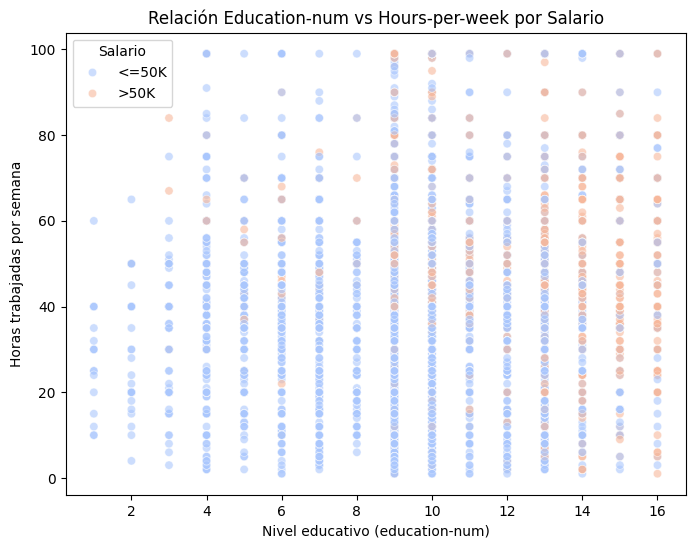

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="education-num",
    y="hours-per-week",
    hue="salary",
    palette="coolwarm",
    alpha=0.6
)
plt.title("Relación Education-num vs Hours-per-week por Salario")
plt.xlabel("Nivel educativo (education-num)")
plt.ylabel("Horas trabajadas por semana")
plt.legend(title="Salario")
plt.show()

El gráfico muestra que las personas con salarios superiores a 50K (color naranja) tienden a concentrarse en niveles educativos más altos (valores altos de education-num) y en rangos de horas trabajadas semanales moderadas a altas, especialmente alrededor de 40 horas y también en grupos que superan las 50 horas.

En contraste, quienes ganan ≤50K (color azul) están distribuidos de forma más uniforme a lo largo de todos los niveles educativos y horas trabajadas, con una fuerte presencia en niveles educativos bajos y medios, incluso trabajando más horas. Esto sugiere que un mayor nivel educativo incrementa la probabilidad de obtener salarios más altos, pero que las horas trabajadas por sí solas no garantizan ingresos superiores, siendo la educación un factor más determinante.

¿Existe una tendencia clara entre las horas trabajadas por semana (hours-per-week) y la probabilidad de ganar más de 50K?

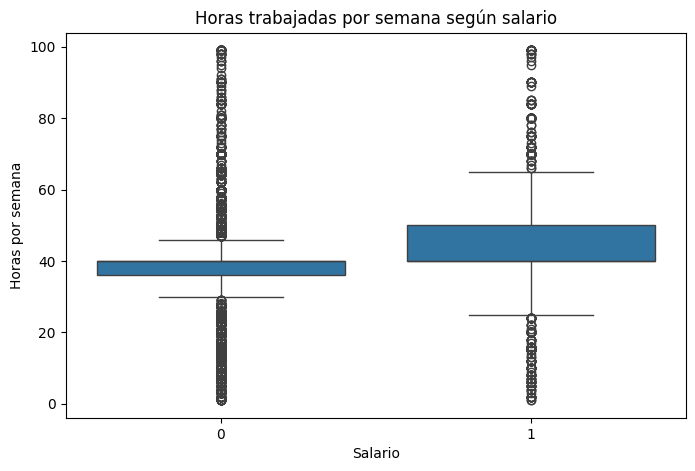

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x="salary", y="hours-per-week", data=df, order=['0', '1'])
plt.title("Horas trabajadas por semana según salario")
plt.xlabel("Salario")
plt.ylabel("Horas por semana")
plt.show()

# Conclusiones sobre las tendencias y patrones asociados al salario

- Género y salario

La proporción de hombres con salario >50K es significativamente mayor que la de mujeres (31.6% vs 11.3%), lo que indica una brecha salarial por género.

Las mujeres están más concentradas en el grupo de ≤50K.

- Nivel educativo (education-num)

El nivel educativo promedio es más alto en personas con >50K (media ≈ 11.6) que en las de ≤50K (media ≈ 9.8).

Existe una relación directa: mayor educación formal, mayor probabilidad de ingresos altos.

- Horas trabajadas por semana

El grupo de >50K trabaja en promedio más horas (≈ 45.5) que el de ≤50K (≈ 39.1).

Esto sugiere que mayor dedicación semanal está asociada con salarios más altos, aunque no necesariamente es el único factor.

- Edad y salario

La probabilidad de ganar >50K aumenta desde los 20 hasta mediados de los 50 años, alcanzando un pico alrededor de los 45-50.

A partir de esa edad, la probabilidad tiende a descender, lo que refleja un patrón de ciclo laboral.

- Capital gain / loss

Tanto las ganancias como las pérdidas de capital son mucho más comunes y elevadas en el grupo >50K.

Esto apunta a que la participación en inversiones y activos financieros es un factor diferencial de los ingresos altos.

- Raza y educación

Hay variaciones en el nivel educativo promedio según raza, pero la variable por sí sola parece tener menos peso que la educación-num y las horas trabajadas para predecir el salario.

In [ ]:
print(df.columns)


Index(['age', 'education-num', 'marital-status', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'salary'],
      dtype='object')


In [ ]:
df.nunique()

,0
age,72
education-num,16
marital-status,7
relationship,6
race,5
sex,2
capital-gain,119
capital-loss,89
hours-per-week,94
salary,2


In [ ]:

df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df["salary"] = df["salary"].map({">50K": 1, "<=50K": 0})


In [ ]:

cols_dummies = ["marital-status", "relationship", "race"]
df = pd.get_dummies(df, columns=cols_dummies, drop_first=True)


En el dataset, la variable sex tiene solo dos categorías (“Male” y “Female”), por lo que se puede codificar a binaria asignando 1 a “Male” y 0 a “Female” sin pérdida de información. La variable salary también es dicotómica (<=50K y >50K), por lo que se puede transformar en 1 para “>50K” y 0 para “<=50K”, lo que facilita su uso como variable objetivo en un modelo de predicción.

Variables como marital-status, relationship y race contienen más de dos categorías sin un orden natural, por lo que no se pueden representar con un número entero simple. Para ellas se debe aplicar codificación one-hot, generando columnas dummy para cada categoría. Esto evita que el modelo interprete un orden inexistente y permite manejar correctamente la información.

Las variables numéricas age, education-num, hours-per-week, capital-gain y capital-loss ya están en un formato adecuado. Sin embargo, dado que capital-gain y capital-loss tienen una gran cantidad de ceros, se podrían crear variables binarias adicionales que indiquen si el valor es mayor que cero, lo que ayudaría a capturar el hecho de que la mayoría de las personas no tienen ganancias o pérdidas de capital, sin eliminar la magnitud de las variables originales.